<a href="https://colab.research.google.com/github/bhavna2608/Digit-Recognition/blob/main/Digit_Recognition_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import OneHotEncoder

In [ ]:
test_df = pd.read_csv('/content/test.csv')
train_df = pd.read_csv('/content/train.csv')

In [ ]:
y_train = train_df["label"]
x_train = train_df.drop("label", axis=1)

In [ ]:
x_train = x_train.values.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = test_df.values.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_train = np.array(y_train)

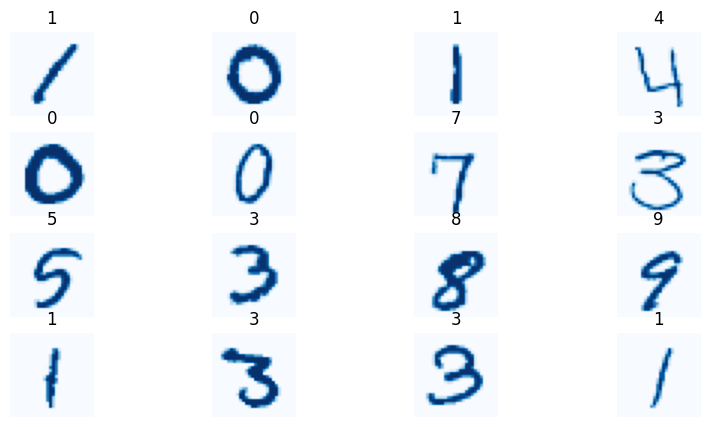

In [ ]:
_, ax = plt.subplots(4, 4, figsize=(10, 5))
i = 0
for image in x_train[:16]:
    label = y_train[i]
    ax[i // 4, i % 4].imshow(image[:, :, 0], cmap="Blues")
    ax[i // 4, i % 4].set_title(label)
    ax[i // 4, i % 4].axis("off")
    i += 1
plt.show()

In [ ]:
enc = OneHotEncoder()
y_train=enc.fit_transform(y_train.reshape(y_train.shape[0],1)).toarray().astype(int)

y_train[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
def Build_Model() -> Sequential:
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
    model.add(AveragePooling2D((2, 2), padding='same'))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(AveragePooling2D((2, 2), padding='same'))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(AveragePooling2D((2, 2), padding='same'))

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(10, activation='softmax'))

    return model

In [ ]:
model = Build_Model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 7, 7, 64)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 average_pooling2d_2 (Averag  (None, 4, 4, 128)        0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

checkpoint = ModelCheckpoint("digit_weights.h5", monitor='loss', verbose=1, save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='loss', factor=0.8, patience=2, verbose=1, mode='auto', min_delta=0.0001, cooldown=5)

early_stop = EarlyStopping(monitor='loss', mode='min', patience=20, restore_best_weights=True)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=1000,
    batch_size=32,
    callbacks=[checkpoint, early_stop, reduceLROnPlat]
)

Epoch 1/1000
1313/1313 [==============================] - ETA: 0s - loss: 0.2517 - accuracy: 0.9200 - auc: 0.9948
Epoch 1: loss improved from inf to 0.25172, saving model to digit_weights.h5
1313/1313 [==============================] - 92s 69ms/step - loss: 0.2517 - accuracy: 0.9200 - auc: 0.9948 - lr: 0.0010
Epoch 2/1000
1312/1313 [============================>.] - ETA: 0s - loss: 0.0798 - accuracy: 0.9761 - auc: 0.9986
Epoch 2: loss improved from 0.25172 to 0.07981, saving model to digit_weights.h5
1313/1313 [==============================] - 90s 69ms/step - loss: 0.0798 - accuracy: 0.9761 - auc: 0.9986 - lr: 0.0010
Epoch 3/1000
1312/1313 [============================>.] - ETA: 0s - loss: 0.0568 - accuracy: 0.9830 - auc: 0.9991
Epoch 3: loss improved from 0.07981 to 0.05673, saving model to digit_weights.h5
1313/1313 [==============================] - 90s 69ms/step - loss: 0.0567 - accuracy: 0.9830 - auc: 0.9991 - lr: 0.0010
Epoch 4/1000
1312/1313 [============================>.] - E

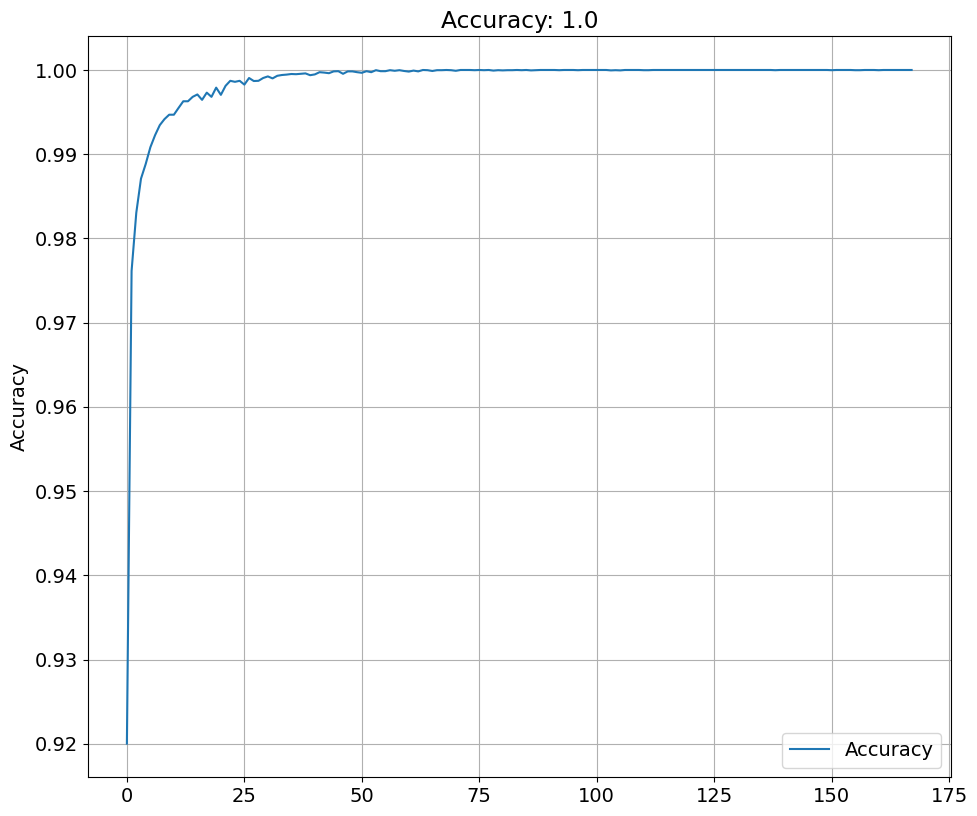

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'Accuracy: {str(acc[-1])}')
plt.tight_layout()
plt.show()

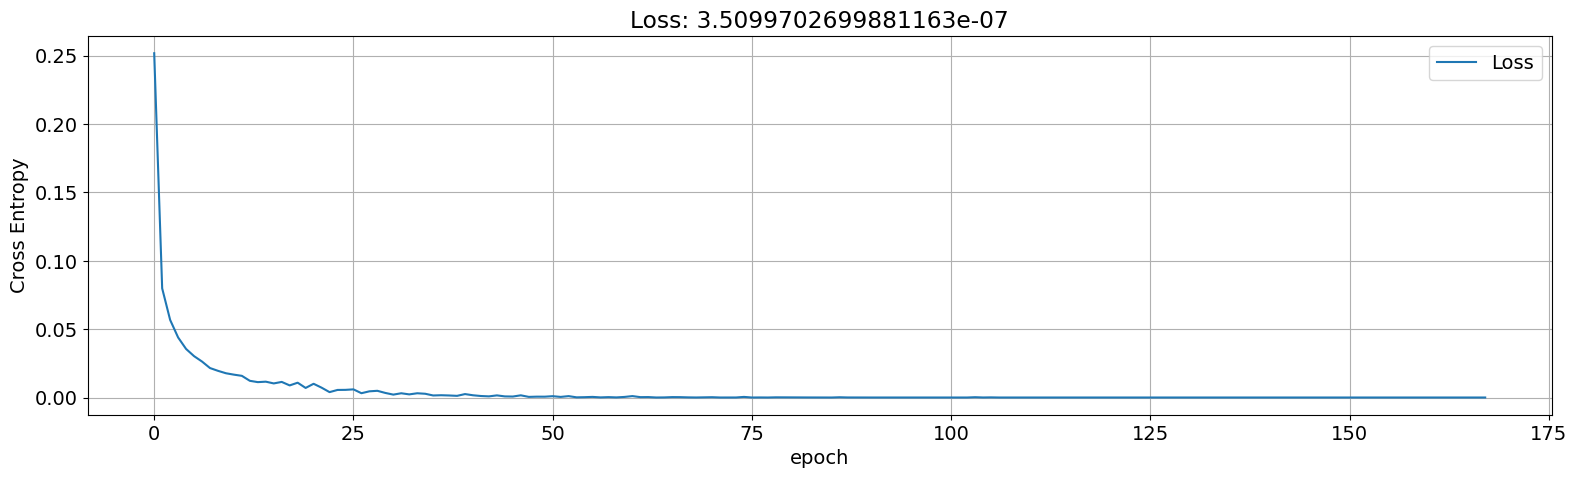

In [ ]:
plt.subplot(2, 1, 2)
plt.plot(loss, label='Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Loss: {str(loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout()
plt.show()

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

875/875 [==============================] - 21s 24ms/step
